In [78]:
import pandas as pd 
import json 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Gather

In [79]:
# open image-predictions flie
data1=pd.read_csv('image-predictions.tsv',sep='\t')
data2=pd.read_csv('twitter-archive-enhanced.csv',sep=',')
data3=pd.read_json('tweet_json.txt',lines = True)

## Assess

### visual

In [80]:
print(data1.head())
print('')
print(data1.tail())
print('')
print(data1.sample())
print('')
print(data2.head())
print('')
print(data2.tail())
print('')
print(data2.sample())
print('')
print(data3.head())
print('')
print(data3.tail())
print('')
print(data3.sample())


             tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheep

### programmatic

In [81]:
print(data1.info())
print(data1.isnull().sum())
print(data1.describe())
print(data2.info())
print(data2.isnull().sum())
print(data2.describe())
print(data3.info())
print(data3.isnull().sum())
print(data3.describe())
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None
tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64
           tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16  

## Clean

#### Define

#### Quality issues
1.rename columns in image-predictions.tsv file  
2.Some tweet have 2 different tweets_id, that are retweets
3. Missing values from images datasets 
4. Delete the add numbers in timestamp in twitter-archive-enhanced.csv
5. Timestamp is string
6. There some problem in the names of the columns so, I will make the names lower and replace '_' to one space
7. after marge there duplicate columns 
8. In several columns null object are non-null (none to NAN) but its empty so I will drop it 
#### Tidiness
9. doggo, floofer, pupper, puppo columns in twitter_archive_enhanced.csv should be combined into a single column as this is one variable that identify stage of dog.
10. Merge the three flies (image-predictions.tsv,twitter-archive-enhanced.csv,tweet_json.txt
11-Merge rating numerator and rating denominator 


#### Code

In [82]:
#make copy of our data
df1= data1.copy()
#rename columns
df1.rename(columns={'jpg_url': 'The picture url',
                    'img_num': 'image number ' ,                 
                    'p1' : 'The first picture',
                    'p2' : 'The secound picture',
                    'p3' : 'The third picture',
                    'p1_dog': 'is the frist picture have a dog',
                    'p2_dog': 'is the secound picture have a dog',
                    'p3_dog': 'is the third picture have a dog',
                    'p1_conf': 'the frist picture configuration',
                    'p2_conf': 'the secound picture configuration',
                    'p3_conf': 'the third picture configuration'}, inplace=True)



In [83]:
data1=pd.read_csv('image-predictions.tsv',sep='\t')
df1= data1.copy()
#rename columns
df1.rename(columns={'jpg_url': 'The picture url',
                    'img_num': 'image number ' ,                 
                    'p1' : 'The first picture',
                    'p2' : 'The secound picture',
                    'p3' : 'The third picture',
                    'p1_dog': 'is the frist picture have a dog',
                    'p2_dog': 'is the secound picture have a dog',
                    'p3_dog': 'is the third picture have a dog',
                    'p1_conf': 'the frist picture configuration',
                    'p2_conf': 'the secound picture configuration',
                    'p3_conf': 'the third picture configuration'}, inplace=True)
#make copy of our data
df2= data2.copy()
#drop useless columns
df2.doggo.replace('None', '', inplace=True)
df2['stage'] = df2.doggo + df2.floofer + df2.pupper + df2.puppo
df2.drop(columns=['in_reply_to_status_id',
                  'in_reply_to_user_id',
                  'retweeted_status_id',
                  'retweeted_status_user_id',
                  'retweeted_status_timestamp',
                  'doggo', 'floofer', 'pupper' , 'puppo'], inplace = True)
 
for x in df2['timestamp']:
    df2['Date'] = df2['timestamp'].apply(lambda x:x.split(' ')[0])
    df2['Time'] = df2['timestamp'].apply(lambda x:x.split(' ')[1])
    df2['xc'] = df2['timestamp'].apply(lambda x:x.split(' ')[2])
df2['created_at'] = df2['Date'] + ' ' + df2['Time']
df2.drop(['timestamp', 'Date','xc','Time'], axis=1, inplace=True)
df2['created_at']= pd.to_datetime(df2['created_at'])
type(df2['created_at'][0])
data3=pd.read_json('tweet_json.txt',lines = True)
df3= data3.copy()
#drop useless columns
df3.drop(columns=['contributors',
                  'coordinates',
                  'geo',
                  'in_reply_to_screen_name',
                  'in_reply_to_status_id',
                  'in_reply_to_status_id_str',
                  'in_reply_to_user_id',
                  'in_reply_to_user_id_str' ,
                  'place',
                  'quoted_status',
                  'quoted_status_id',
                  'quoted_status_id_str',
                  'retweeted_status'], inplace = True)
#drop columns which have another tweet id 
#make copy of our data
df3.drop(columns=['id_str'])
df3.rename(columns={'id': 'tweet_id'},inplace= 'True')


In [84]:
# merge the three files
df4 = pd.merge(df1, df2, how="inner", on="tweet_id")
merge = pd.merge(df4, df3, how="inner", on="tweet_id")
#make columns name lower and replace '_' to one space
merge.rename(columns=lambda x:x.strip().lower().replace('_',' '),inplace = True)
#drop missing values
merge.dropna(inplace=True) 
#drop duplicate columns
merge.drop(columns=['source y','created at y','text y' ], inplace = True)
merge.rename(columns={'source x': 'source','created at x':'created at','text x':'text x'},inplace= 'True')
#merge rating numerator and rating denominator into one column
merge['rating']=merge['rating numerator'] + merge['rating denominator']
# drop unneeded and retweet columns
merge.drop(columns=['rating numerator','rating denominator'], inplace = True)
x = merge[merge['text x'].str.contains('RT @')]['text x'].keys()
for y in x :
    merge.drop(index=y,inplace=True)


#### Test

In [85]:
print(df1.info())
print(' ')
print(df2.dtypes)
print(' ')
print(merge.head)
print(' ')
print(merge.info())
print(' ')
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                             2075 non-null int64
The picture url                      2075 non-null object
image number                         2075 non-null int64
The first picture                    2075 non-null object
the frist picture configuration      2075 non-null float64
is the frist picture have a dog      2075 non-null bool
The secound picture                  2075 non-null object
the secound picture configuration    2075 non-null float64
is the secound picture have a dog    2075 non-null bool
The third picture                    2075 non-null object
the third picture configuration      2075 non-null float64
is the third picture have a dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None
 
tweet_id                       int64
source                        object
text                          object
expanded_ur

## insights

1296
1279
1254


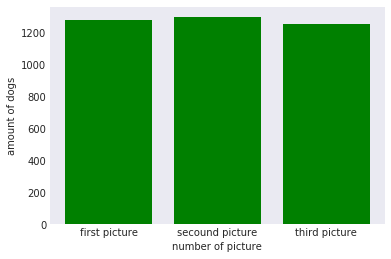

In [86]:
# insight one 
# how many times dog appear in picture?
print(sum(merge['is the secound picture have a dog']== True))
print(sum(merge['is the frist picture have a dog']== True))
print(sum(merge['is the third picture have a dog']== True))
# the dog picture is are most common in the second picture 
#and the dog picture in first picture are more than in the third 
df_f = sum(merge['is the frist picture have a dog']== True)
df_s = sum(merge['is the secound picture have a dog']== True)
df_t = sum(merge['is the third picture have a dog']== True)
#  the insight visualization
locations = [1,2,3]
hights=[df_f,df_s,df_t]
labels= ['first picture',
         'secound picture',
         'third picture']
plt.bar(locations,hights,tick_label = labels, color = 'g')
plt.xlabel('number of picture')
plt.ylabel('amount of dogs')
sns.set_style('dark')

In [87]:
#insight two
# the most month to posting is 12 
merge['month'] = merge['created at'].dt.month
print(merge['month'].value_counts()) 
print(' ')
# the most day of week to posting is monday
merge['weekday_name'] = merge['created at'].dt.weekday_name
print(merge['weekday_name'].value_counts())
print(' ')
# the most hour to posting is 1
merge['hour'] = merge['created at'].dt.hour
print(merge['hour'].value_counts())
  

12    405
11    340
1     215
3     142
2     133
7     109
6      94
5      69
4      66
8      60
9      59
10     54
Name: month, dtype: int64
 
Monday       288
Wednesday    258
Tuesday      258
Thursday     254
Friday       235
Sunday       234
Saturday     219
Name: weekday_name, dtype: int64
 
1     250
2     206
0     205
3     168
16    139
17    129
4      96
23     90
18     87
15     75
19     70
20     70
21     66
22     58
5      26
14      7
6       3
13      1
Name: hour, dtype: int64


Text(0.5,1,'distribution of common posts hours in day')

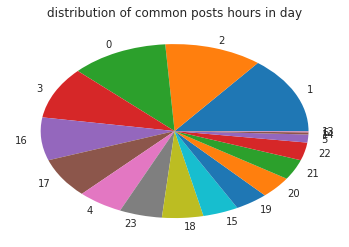

In [88]:
labels=merge['hour'].value_counts().keys()
plt.pie(merge['hour'].value_counts(), labels= labels)
plt.title('distribution of common posts hours in day')

Text(0.5,1,'distribution of common posts in months')

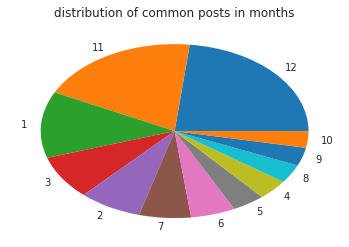

In [89]:
labels=merge['month'].value_counts().keys()
plt.pie(merge['month'].value_counts(), labels= labels)
plt.title('distribution of common posts in months')

Text(0.5,1,'distribution of common posts in week')

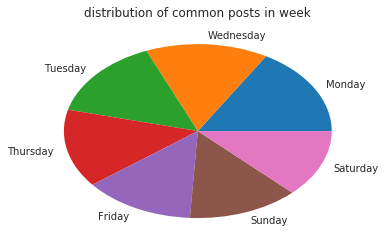

In [90]:
labels=merge['weekday_name'].value_counts().keys()
plt.pie(merge['weekday_name'].value_counts(), labels= labels)
plt.title('distribution of common posts in week')

In [91]:
#insight three
#what is the most common dog in the pictures?
v_c1=merge[merge['is the frist picture have a dog'] == True]['the first picture'].value_counts()
v_c2=merge[merge['is the secound picture have a dog'] == True]['the secound picture'].value_counts()
v_c3= merge[merge['is the third picture have a dog'] == True]['the third picture'].value_counts()
v_c = v_c1 + v_c2 + v_c3
print(v_c.max())
print(v_c[v_c == 290.0])
# the most common dog type appear in the pictures is golden retriever
#insight four
# what is the common posts language ?
print(merge['lang'].value_counts())
# the most languge use is en then nl then in 

238.0
Series([], dtype: float64)
en    1739
nl       3
in       2
et       1
eu       1
Name: lang, dtype: int64


In [92]:
# insight five
# what the lowest picture in retweet count?
import requests
import os 
from IPython.display import HTML, display
x=merge['retweet count'].min() 
merge[merge['retweet count']== x]
merge[merge['retweet count']== x]['the picture url']
print('source is',merge[merge['retweet count']==x]['the picture url'])
display(HTML('<img src=" https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg" />'))

source is 16    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg
Name: the picture url, dtype: object


In [93]:
# what is the worst picture ?
x =merge['rating'].min()
merge[merge['rating']== x]
print('source is',merge[merge['rating']==x]['the picture url'])
display(HTML('<img src=" https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg" />'))
# what is the favorite  dog ?
x =merge['rating'].max()
merge[merge['rating']== x]
merge[merge['rating']==x]['the picture url']
print('source is',merge[merge['rating']==x]['the picture url'])
display(HTML('<img src=" https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg" />'))


source is 20    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg
Name: the picture url, dtype: object


source is 1268    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: the picture url, dtype: object


In [94]:
#save data 
merge.to_csv('merged_data')

In [95]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746 entries, 0 to 2065
Data columns (total 35 columns):
tweet id                             1746 non-null int64
the picture url                      1746 non-null object
image number                         1746 non-null int64
the first picture                    1746 non-null object
the frist picture configuration      1746 non-null float64
is the frist picture have a dog      1746 non-null bool
the secound picture                  1746 non-null object
the secound picture configuration    1746 non-null float64
is the secound picture have a dog    1746 non-null bool
the third picture                    1746 non-null object
the third picture configuration      1746 non-null float64
is the third picture have a dog      1746 non-null bool
source                               1746 non-null object
text x                               1746 non-null object
expanded urls                        1746 non-null object
name                        

In [96]:
 merge[merge['text x'].str.contains('RT @')]

,tweet id,the picture url,image number,the first picture,the frist picture configuration,is the frist picture have a dog,the secound picture,the secound picture configuration,is the secound picture have a dog,the third picture,...,possibly sensitive,possibly sensitive appealable,retweet count,retweeted,truncated,user,rating,month,weekday_name,hour
